In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
class Bandit:
    def RewardFn(self, arm):
        if arm == 3:
            return 10.0
        elif arm == 8:
            return 7.0
        else:
            return -1
        
    def __init__(self, K):
        self.K = K
        self.total = 0
        self.rewards = np.random.normal(0, 1, (K, ))
        self.records = np.zeros_like(self.rewards)
        self.history = []
        for i in range(K):
            self.records[i] = 1
            self.rewards[i] += self.RewardFn(i)
        self.n = K
        

    def getArm(self):
         return np.argmax(self.rewards + np.sqrt(2 * self.n/(self.records)))
        
    def Pull(self):
        arm = self.getArm()
        self.records[arm] += 1
        currReward = self.RewardFn(arm)
        self.total += currReward
        self.history.append(self.total)
        self.rewards[arm] = (self.rewards[arm] * self.n + currReward)/(self.n + 1) 
        self.n += 1

In [30]:
agent = Bandit(10)

In [42]:
for i in range(1000):
    agent.Pull()

In [43]:
agent.records

array([  69.,   76.,   91., 4761.,   70.,   84.,   70.,   86.,  640.,
         63.])

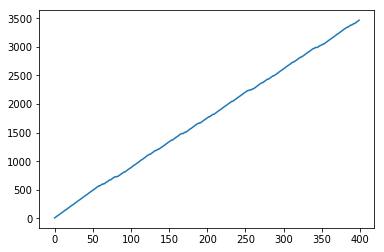

In [44]:
plt.plot(agent.history[:400])